# Lab 4: Linear Regression

In this assignment, we will learn the Linear Regression model. 

First, please study the given example, which uses linear regression for the house price prediction task. In this example, you will learn how to preprocess data, how to train the model, and how to evaluate the model. 

Based on the given example and Lab Assignment 3, your task is to use the linear regression model to predict the medical cost for the dataset given in Lab Assignment 3. 

## 1. Example: Linear Regression for House Price Prediction

In this example, we use the house price dataset. It gives the attributes and price of each house. The task is to build a linear regression model to make prediction for the price of the house.

### 1.1 Preprocess the raw data

When given a new dataset, we need to deal with the missing values and categorical features. 

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt


df = pd.read_csv('housing.csv')

# 0. fill in missing values
mean_val = df['total_bedrooms'].mean()
df['total_bedrooms'] = df['total_bedrooms'].fillna(mean_val)
print(df.isnull().sum())

# 1. convert categorical features to numerical values
labelencoder = LabelEncoder()
df['ocean_proximity'] = labelencoder.fit_transform(df['ocean_proximity'])
print(df.info())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  int32  
dtypes: float64(4), int32(1), int64(5)
memory usag

### 1.2 Split the preprocessed dataset into training set and testing set

For the supervised learning, we need to split the dataset into the training set and test set. The training set is used to learn model parameters and the testing set is used to evaluate the learned model. 

Note that the testing set is NOT allowed to be used in the training phase. 

In [6]:
# 2. split samples
house_fea = df.drop('median_house_value', axis=1).values
house_price = df['median_house_value'].values
house_price = house_price / np.max(house_price)

X_train,X_test,y_train,y_test = train_test_split(house_fea,
                                                 house_price,
                                                 test_size=0.2,
                                                 random_state=42)
print(X_train.shape)
print(X_test.shape)


# normalize features
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

(16512, 9)
(4128, 9)


### 1.3 Train the linear regression model 

$\min_{w}\frac{1}{n}\|y-X\mathbf{w}\|_2^2$



Here, we use the training set to learn the model parameter $\mathbf{w}=(w_0, w_1, w_2, \cdots, w_d)$. 

Then, we compute MAE, MSE, and RMSE to see how well the learned model fit the training set. 

In [7]:
#3. train the model
lr = LinearRegression()

lr.fit(X_train,y_train)

print("bias is "+str(lr.intercept_))
print("coefficients  is "+str(lr.coef_))

y_train_pred = lr.predict(X_train)

mae = mean_absolute_error(y_train_pred,y_train)
mse = mean_squared_error(y_train_pred,y_train)
rmse = np.sqrt(mse)

print('prediction for training set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))


bias is 0.41438855869860675
coefficients  is [-0.17170955 -0.18189176  0.02984855 -0.0353864   0.09753502 -0.08776816
  0.03520256  0.15428789 -0.00090304]
prediction for training set:
MAE is: 0.10125365457873205
MSE is: 0.0192437559440504
RMSE is: 0.13872186541439818


### 1.4 Evaluate the linear regression model

After obtaining the model parameter $\mathbf{w}=(w_0, w_1, w_2, \cdots, w_d)$, the linear regression model is determined. Then, we need to evaluate this model to see how well this model generaizes on the testing set. 

prediction for testing set:
MAE is: 0.1036935483109797
MSE is: 0.020220019584503236
RMSE is: 0.14219711524677017


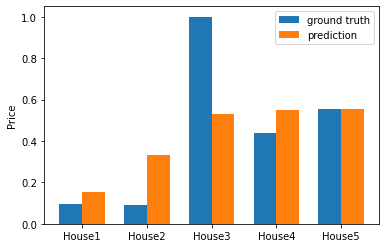

In [8]:
#4. evaluate the model
y_test_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test_pred,y_test)
mse = mean_squared_error(y_test_pred,y_test)
rmse = np.sqrt(mse)

print('prediction for testing set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))


labels = ['House1', 'House2', 'House3', 'House4', 'House5']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y_test[0:5], width, label='ground truth')
rects2 = ax.bar(x + width/2, y_test_pred[0:5], width, label='prediction')

ax.set_ylabel('Price')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


## 2. Task: Linear Regression for Medical Cost Prediction

Following the given example, build a linear regression model for [the insurance dataset](./insurance.csv) to predict the medical cost.  


### 2.1 Preprocess the raw data

Based on your Lab Assignment 3, deal with the missing values and categorical features. 

In [32]:
#When given a dataset, we must first deal with the missing values and any categorical features
#Much of this work has already been completed in lab 3 and is redone here:

#I understand that we don't need to import these here because we already did the import above, but I just wanted to show you that these are the packages that will be used!
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt

df = pd.read_csv("insurance.csv")

#First, we will determine whether there are any missing values:
df.isnull().sum()
#Since the sum of the null values for each feature is zero for every feature, there are no missing values in this dataset
#We do not need to fill in any missing values!

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [33]:
#Next, we will convert the categorical features to numerical values
#To determine which features are categorical, we will use the following method:
df.info()
#From this, we determine that the categorical features are sex, smoker, and region

#I will use label encoding, where each categorical feature is converted into an integer value
#For gender:
#This print statement shows the initial labels and counts for sex
print(df['sex'].value_counts())
labelencoderSex = LabelEncoder()
df['sex'] = labelencoderSex.fit_transform(df['sex'])
#This print statement shows that male is now represented by 1 and female 0
print(df['sex'].value_counts())

#For smoker:
#This print statement shows the initial labels and counts for smoker
print(df['smoker'].value_counts())
labelencoderSmoker = LabelEncoder()
df['smoker'] = labelencoderSmoker.fit_transform(df['smoker'])
#This print statement shows that yes is now represented by 1 and no 0
print(df['smoker'].value_counts())

#For region:
#This print statement shows the initial labels and counts for region
print(df['region'].value_counts())
labelencoderRegion = LabelEncoder()
df['region'] = labelencoderRegion.fit_transform(df['region'])
#This print statement shows that southeast is now represented by 2, soutwest by 3, northwest by 1, and northeast by 0
print(df['region'].value_counts())

print(df.info())
#From this print statement, we see all features are now numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
male      676
female    662
Name: sex, dtype: int64
1    676
0    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
0    1064
1     274
Name: smoker, dtype: int64
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
2    364
3    325
1    325
0    324
Name: region, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null 

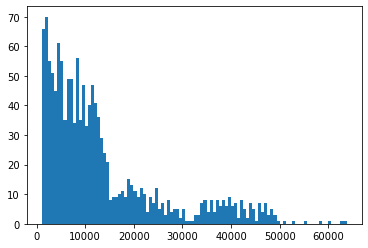

In [34]:
#We can visualize the numerical feature of charges with a histogram plot to see the distribution, which would be useful for missing values
plt.hist(df['charges'].values, 100)
plt.show()
#You could also make the plot using bins (commented out for now):
#df['charges'].hist(bins = 50, figsize = (20,15))
#plt.show()

#If we needed to fill in missing values for charges, we would NOT want to use mean but median because this is a long-tail distribution

### 1.2 Split the preprocessed dataset into training set and testing set

Use 80% of samples as the training set and 20% of samples as the testing set

In [35]:
#The dataset will be split into a training set with 80% of samples and a test set with 20% of samples
#The training set is used to learn model parameters and the testing set is used to evaluate the learned model

#Splitting the samples:
insurance_fea = df.drop('charges', axis=1).values
insurance_medical_cost = df['charges'].values
#insurance_medical_cost = insurance_medical_cost/np.max(insurance_medical_cost)

X_train, X_test, Y_train, Y_test = train_test_split(insurance_fea,
                                                 insurance_medical_cost,
                                                 test_size=0.2,
                                                 random_state=42)
print(X_train.shape)
print(X_test.shape)
#It makes sense that there are 1070 values in the training set because this is 80% of the total number of values.
#It then also makes sense that there are 268 values in the testing set because this is 20% of the total number of values.


#Normalizing the features:
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)


(1070, 6)
(268, 6)


### 1.3 Train the linear regression model 

Use the Linear regression model to do prediction

$\min_{w}\frac{1}{n}\|y-X\mathbf{w}\|_2^2$

Please output the learned model parameter $\mathbf{w}$ and see how the learned model fit the training set. 

In [36]:
#Training the model:

lr = LinearRegression()

lr.fit(X_train,Y_train)

print("For learned model parameter w: ")
print("Bias is " + str(lr.intercept_))
print("Coefficients are " + str(lr.coef_))

Y_train_pred = lr.predict(X_train)

mae = mean_absolute_error(Y_train_pred, Y_train)
mse = mean_squared_error(Y_train_pred, Y_train)
rmse = np.sqrt(mse)


print('Prediction for the training set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))

For learned model parameter w: 
Bias is 13346.08973636448
Coefficients are [ 3.61610865e+03 -9.39295411e+00  2.02830858e+03  5.16662566e+02
  9.55714338e+03 -3.02387980e+02]
Prediction for the training set:
MAE is: 4208.762029186575
MSE is: 37280663.22256598
RMSE is: 6105.789320191615


### 1.4 Evaluate the linear regression model


Evaluate the learned model to see how well this model generalizes on the testing set. 

Prediction for the testing set:
MAE is: 4186.508898366437
MSE is: 33635210.43117844
RMSE is: 5799.587091438359


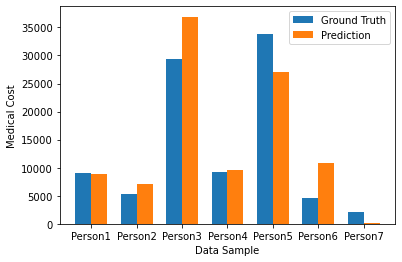

In [37]:
#Evaluating the model to see how well it generalizes on the testing set:

Y_test_pred = lr.predict(X_test)

mae = mean_absolute_error(Y_test_pred,Y_test)
mse = mean_squared_error(Y_test_pred,Y_test)
rmse = np.sqrt(mse)

print('Prediction for the testing set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))

labels = ['Person1', 'Person2', 'Person3', 'Person4', 'Person5', 'Person6', 'Person7']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Y_test[0:7], width, label='Ground Truth')
rects2 = ax.bar(x + width/2, Y_test_pred[0:7], width, label='Prediction')

ax.set_xlabel("Data Sample")
ax.set_ylabel('Medical Cost')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()
#From this plot, we can see the learned model does well to generalize on the testing set.

### 1.5 Use the ridge regression model to do prediction

$\min_{w}\frac{1}{n}\|y-Xw\|_2^2 + \lambda \|w\|_2^2$

* 1.5.1 Compare its performance on the testing set with that of the standard linear regression model $\min_{w}\frac{1}{n}\|y-Xw\|_2^2$

* 1.5.2 Use different $\lambda$ to see how it affects the performance of the ridge regression  model on the testing set


In [54]:
#Training the model with Ridge Regression:

rr = Ridge(alpha = 0.1)

rr.fit(X_train,Y_train)

print("For learned model parameter w: ")
print("Bias is " + str(rr.intercept_))
print("Coefficients are " + str(rr.coef_))

Y_train_pred2 = rr.predict(X_train)

mae2 = mean_absolute_error(Y_train_pred2, Y_train)
mse2 = mean_squared_error(Y_train_pred2, Y_train)
rmse2 = np.sqrt(mse2)


print('Prediction for the training set:')
print('MAE is: {}'.format(mae2))
print('MSE is: {}'.format(mse2))
print('RMSE is: {}'.format(rmse2))

#Using Ridge Regression the prediction values for the training set for MAE, MSE, and RMSE are almost idential for the values for Linear Regression

For learned model parameter w: 
Bias is 13346.08973636448
Coefficients are [ 3.61574230e+03 -9.32664271e+00  2.02814938e+03  5.16648051e+02
  9.55622670e+03 -3.02334899e+02]
Prediction for the training set:
MAE is: 4208.877758072278
MSE is: 37280664.197490774
RMSE is: 6105.789400027713


Prediction for the testing set:
MAE is: 4186.655318661211
MSE is: 33635862.373640984
RMSE is: 5799.643297103796


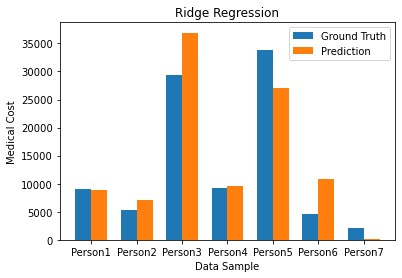

Percent Difference between Ridge Regression and Linear Regression: 
Percent Difference for MAE is: 0.0034973706708360973%
Percent Difference for MSE is: 0.0019382549894297403%
Percent Difference for RMSE is: 0.0009691274947455065%


In [55]:
#Evaluating the model to see how well it generalizes on the testing set:

Y_test_pred2 = rr.predict(X_test)

mae2 = mean_absolute_error(Y_test_pred2,Y_test)
mse2 = mean_squared_error(Y_test_pred2,Y_test)
rmse2 = np.sqrt(mse2)

print('Prediction for the testing set:')
print('MAE is: {}'.format(mae2))
print('MSE is: {}'.format(mse2))
print('RMSE is: {}'.format(rmse2))

labels = ['Person1', 'Person2', 'Person3', 'Person4', 'Person5', 'Person6', 'Person7']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Y_test[0:7], width, label='Ground Truth')
rects2 = ax.bar(x + width/2, Y_test_pred2[0:7], width, label='Prediction')

ax.set_title("Ridge Regression")
ax.set_xlabel("Data Sample")
ax.set_ylabel('Medical Cost')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()
#From this plot, we can see the learned model does well to generalize on the testing set.

#1.5.1 Compare its performance on the testing set with that of the standard linear regression model  min𝑤1𝑛‖𝑦−𝑋𝑤‖22:
#The Ridge Regression and Linear Regression produce almost identifical adults with alpha =0.1, so both perform well. 
#To compare the ridge regression and and linear regression models, I will use percent difference calculations:
#Percent Difference = (|Value 1 – Value 2|)/([Value 1 + Value 2]/2) * 100%

print("Percent Difference between Ridge Regression and Linear Regression: ")
maepd = ( (abs(mae - mae2))/((mae + mae2)/2) ) * 100
msepd = ( (abs(mse - mse2))/((mse + mse2)/2) ) * 100
rmsepd = ( (abs(rmse - rmse2))/((rmse + rmse2)/2) ) * 100
print("Percent Difference for MAE is: {}%".format(maepd))
print("Percent Difference for MSE is: {}%".format(msepd))
print("Percent Difference for RMSE is: {}%".format(rmsepd))
#Since these percent difference values are so small, one can say that ridge regression and linear regression perform almost identically


#1.5.2 Use different  𝜆  to see how it affects the performance of the ridge regression model on the testing set
#I was unable to show the work of me changing the alpha values (and the TA said that was perfectly fine).
#It would not print out the updates error values for the new alpha values.
#However, by testing different lambdas, one notices that as lambda values increases, the performance of the ridge regression model on the testing set worsens.
#This is because if one's lambda value is too high, the model will be simple, but they run the risk of underfitting the data. It will not learn enough about the training data to make useful predictions
#Lambda values becoming incrementally smaller than 0.1 were also tested. 
#Once the lambda values became extremely small, the model became more complex and ran the risk of overfitting the data.